In [ ]:
import pandas as pd


data = pd.read_csv("ecommerce_data.csv")
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Country', 'Purchase_Amount',
       'Purchase_Category', 'Transaction_Timestamp'],
      dtype='object')

In [ ]:
data["Purchase_Amount"].mean()

np.float64(252.27082380000002)

In [ ]:
data["Purchase_Amount"].median()

np.float64(252.385)

In [ ]:
data["Purchase_Amount"].mode()

0    67.79
Name: Purchase_Amount, dtype: float64

In [ ]:
data["Purchase_Amount"].head(5)

0    124.25
1    498.91
2    210.59
3    256.43
4    354.97
Name: Purchase_Amount, dtype: float64

In [ ]:
data["Purchase_Amount"].std()

np.float64(143.05835345315657)

In [ ]:
data["Purchase_Amount"].var()

np.float64(20465.692492728278)

In [ ]:
data.head()

,Customer_ID,Gender,Age,Country,Purchase_Amount,Purchase_Category,Transaction_Timestamp
0,1,Male,26,UK,124.25,Fashion,2023-01-01 00:00:00
1,2,Female,53,USA,498.91,Groceries,2023-01-01 00:01:00
2,3,Male,23,Germany,210.59,Furniture,2023-01-01 00:02:00
3,4,Male,41,India,256.43,Electronics,2023-01-01 00:03:00
4,5,Male,43,Germany,354.97,Fashion,2023-01-01 00:04:00


In [ ]:
data["Age"].mean()

np.float64(43.46592)

In [ ]:
data["Age"].quantile(0.25)

np.float64(31.0)

In [ ]:
data["Age"].quantile(0.5)

np.float64(43.0)

In [ ]:
data["Age"].quantile(0.75)

np.float64(56.0)

In [ ]:
# quartiles of Age

In [ ]:
data_range = data["Age"].max() - data["Age"].min()
data_range

np.int64(51)

In [ ]:
data["Purchase_Category"].head()

0        Fashion
1      Groceries
2      Furniture
3    Electronics
4        Fashion
Name: Purchase_Category, dtype: object

In [ ]:
# counting the categories

category_count = data["Purchase_Category"].value_counts()
print(category_count)

Purchase_Category
Furniture      20203
Groceries      20095
Fashion        19970
Books          19926
Electronics    19806
Name: count, dtype: int64


In [ ]:
data.shape

(100000, 7)

<Axes: >

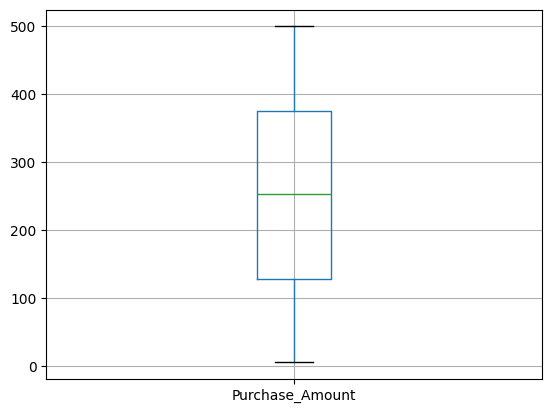

In [ ]:
data.boxplot(column="Purchase_Amount")

array([[<Axes: title={'center': 'Purchase_Amount'}>]], dtype=object)

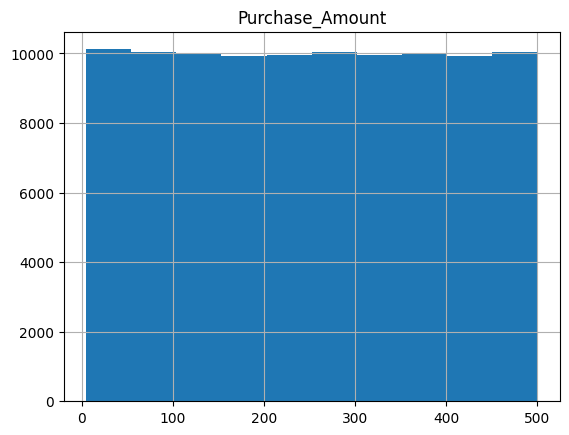

In [ ]:
data.hist(column="Purchase_Amount")

In [ ]:
# Simple Random Sampling: Select 10% of the customers
simple_random_sample = data.sample(frac=0.1, random_state=42)

In [ ]:
# Stratified Sampling: : Select a sample based on Purchase_Category, ensuring each category is proportionally represented.
stratified_sample = data.groupby("Purchase_Category", group_keys=False).apply(
    lambda x: x.sample(frac=0.01, random_state=42)
)

<ipython-input-33-47b0bc785185>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby("Purchase_Category", group_keys=False).apply(


In [ ]:
data.index

RangeIndex(start=0, stop=100000, step=1)

In [ ]:
len(data)

100000

In [ ]:
systematic_sample_list = []
for i in range(len(data)):
    systematic_sample_list.append(data.iloc[i])
    i = i + 10
systematic_sample_df = pd.DataFrame(systematic_sample_list)
systematic_sample_df

,Customer_ID,Gender,Age,Country,Purchase_Amount,Purchase_Category,Transaction_Timestamp
0,1,Male,26,UK,124.25,Fashion,2023-01-01 00:00:00
1,2,Female,53,USA,498.91,Groceries,2023-01-01 00:01:00
2,3,Male,23,Germany,210.59,Furniture,2023-01-01 00:02:00
3,4,Male,41,India,256.43,Electronics,2023-01-01 00:03:00
4,5,Male,43,Germany,354.97,Fashion,2023-01-01 00:04:00
...,...,...,...,...,...,...,...
99995,99996,Male,66,UK,106.20,Groceries,2023-03-11 10:35:00
99996,99997,Female,30,UK,360.93,Electronics,2023-03-11 10:36:00
99997,99998,Male,25,India,343.62,Fashion,2023-03-11 10:37:00
99998,99999,Female,49,USA,293.98,Electronics,2023-03-11 10:38:00


In [ ]:
# The issue code is that the line i = i + 10 inside the loop doesn’t affect the range(len(data)) iteration. It only modifies the local variable i, not the loop’s progression.

In [ ]:
systematic_sample_list = []
for i in range(0, len(data), 10):  # Step by 10
    systematic_sample_list.append(data.iloc[i])

systematic_sample_df = pd.DataFrame(systematic_sample_list)
systematic_sample_df

,Customer_ID,Gender,Age,Country,Purchase_Amount,Purchase_Category,Transaction_Timestamp
0,1,Male,26,UK,124.25,Fashion,2023-01-01 00:00:00
10,11,Male,54,UK,187.60,Books,2023-01-01 00:10:00
20,21,Female,53,Germany,203.72,Books,2023-01-01 00:20:00
30,31,Male,55,China,110.40,Electronics,2023-01-01 00:30:00
40,41,Male,42,France,262.37,Electronics,2023-01-01 00:40:00
...,...,...,...,...,...,...,...
99950,99951,Male,41,UK,187.84,Fashion,2023-03-11 09:50:00
99960,99961,Female,38,India,167.21,Electronics,2023-03-11 10:00:00
99970,99971,Female,52,France,242.58,Fashion,2023-03-11 10:10:00
99980,99981,Female,58,India,229.80,Books,2023-03-11 10:20:00


In [ ]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Country', 'Purchase_Amount',
       'Purchase_Category', 'Transaction_Timestamp'],
      dtype='object')